# Libraries

In [33]:
import pandas as pd 
import gzip
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Open Dataset

In [5]:
# Ouvrir et lire le fichier .gz avec le bon nom
with gzip.open('C:/Users/X280/Desktop/Cisco_22_networks/dir_20_graphs/dir_day1/out1_1.txt.gz', 'rt') as f:
    data = pd.read_csv(f, delimiter='\t')  # Adapte le délimiteur si nécessaire
print(data)



        g1      1      2          1p6-22,1p17-4,2p6-12,3p6-12,4p6-12,5p6-12
0       g2      1      2                                            1p6-625
1       g2      3      4                                             1p17-4
2       g1      3      4  6p6-38,7p6-92,8p6-37,9p6-26,10p6-113,11p6-33,1...
3       g3      1      2                                             1p6-45
4       g2      5      6                                             2p6-34
...     ..    ...    ...                                                ...
566829  g2   4405     12                                      3p17-7,8p17-1
566830  g2  15881    233                                             2p6-28
566831  g2   3191   3052                                             2p6-14
566832  g4  19214      2                                             1p6-26
566833  g2   2622  31566                                            77p17-1

[566834 rows x 4 columns]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566834 entries, 0 to 566833
Data columns (total 4 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   g1                                         566834 non-null  object
 1   1                                          566834 non-null  int64 
 2   2                                          566834 non-null  int64 
 3   1p6-22,1p17-4,2p6-12,3p6-12,4p6-12,5p6-12  566834 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.3+ MB


# Read_gt 

In [5]:
import sys
sys.path.append(r'C:\Users\X280\Desktop\Cisco_22_networks')

import read_gt

In [6]:
gt_file = r'C:\Users\X280\Desktop\Cisco_22_networks\dir_g21_small_workload_with_gt\groupings.gt.txt'

node_gt, gt_nodes = read_gt.read_gt(gt_file)



# num gt sets=23  size(node_to_gt)=59
# gt sizes histo: Counter({2: 8, 3: 8, 1: 4, 4: 2, 7: 1})
# group sizes descending: [7, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]



In [7]:
gt_file = r'C:\Users\X280\Desktop\Cisco_22_networks\dir_g21_small_workload_with_gt\groupings.gt.viaPrefix5.txt'

node_gt, gt_nodes = read_gt.read_gt(gt_file)


# num gt sets=18  size(node_to_gt)=52
# gt sizes histo: Counter({3: 8, 1: 3, 2: 3, 4: 2, 5: 1, 6: 1})
# group sizes descending: [6, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]



# Split of dataset

In [15]:
data.columns=["Graphe_Appartenance", "Client_ID", "Serveur_ID", "Protocole"]


In [16]:
label_encoder = LabelEncoder()
data['Protocole'] = label_encoder.fit_transform(data['Protocole'])



In [17]:
data

,Graphe_Appartenance,Client_ID,Serveur_ID,Protocole
0,g2,1,2,67482
1,g2,3,4,49855
2,g1,3,4,158664
3,g3,1,2,64916
4,g2,5,6,94241
...,...,...,...,...
566829,g2,4405,12,109343
566830,g2,15881,233,93108
566831,g2,3191,3052,90016
566832,g4,19214,2,57287


In [18]:
X= data.iloc[:,1:]
y=data.iloc[:,0]
print(X)
print(y)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

        Client_ID  Serveur_ID  Protocole
0               1           2      67482
1               3           4      49855
2               3           4     158664
3               1           2      64916
4               5           6      94241
...           ...         ...        ...
566829       4405          12     109343
566830      15881         233      93108
566831       3191        3052      90016
566832      19214           2      57287
566833       2622       31566     162380

[566834 rows x 3 columns]
0         g2
1         g2
2         g1
3         g3
4         g2
          ..
566829    g2
566830    g2
566831    g2
566832    g4
566833    g2
Name: Graphe_Appartenance, Length: 566834, dtype: object


# Models

## KNN

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_val_predictions = knn.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_predictions)

In [22]:
knn_val_accuracy 

0.9239056288664643

Le nombre optimal de voisins est : 1


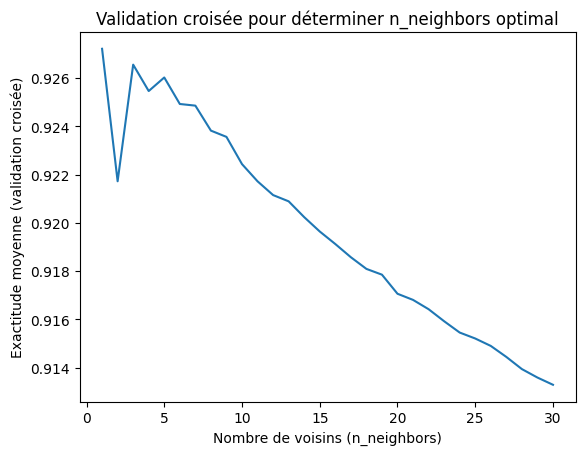

In [23]:
n_neighbors_range = range(1, 31)
cv_scores = []  


for n in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') 
    cv_scores.append(scores.mean())


optimal_n = n_neighbors_range[np.argmax(cv_scores)]
print(f"Le nombre optimal de voisins est : {optimal_n}")

plt.plot(n_neighbors_range, cv_scores)
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Exactitude moyenne (validation croisée)')
plt.title('Validation croisée pour déterminer n_neighbors optimal')
plt.show()


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_val_predictions = knn.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_predictions)

In [25]:
knn_val_accuracy 

0.929198127631548

On trouve que le nombre de voisins optimal est 1 je pense qu'on a donc une forte sensibilité aux données vu qu'une augmentation de cette dernière entraine la diminution de la préicision. Je pense qu'il faudra donc ajuster nos données afin de diminuer le bruit

In [27]:
def remove_outliers_iqr(X, y):
    X_df = pd.DataFrame(X)
    
    Q1 = X_df.quantile(0.25)
    Q3 = X_df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((X_df < (Q1 - 1.5 * IQR)) | (X_df > (Q3 + 1.5 * IQR))).any(axis=1)
    return X[mask.to_numpy()], y[mask.to_numpy()]

def apply_pca(X_train, X_test, variance_ratio=0.95):
    pca = PCA(n_components=variance_ratio)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

def remove_outliers_lof(X, y):
    lof = LocalOutlierFactor()
    outliers = lof.fit_predict(X)
    mask = (outliers == 1) 
    return X[mask], y[mask]

X_train, y_train = remove_outliers_iqr(X_train, y_train)

X_train, y_train = remove_outliers_lof(X_train, y_train)

X_train_pca, X_test_pca = apply_pca(X_train, X_test)

Le nombre optimal de voisins est : 7


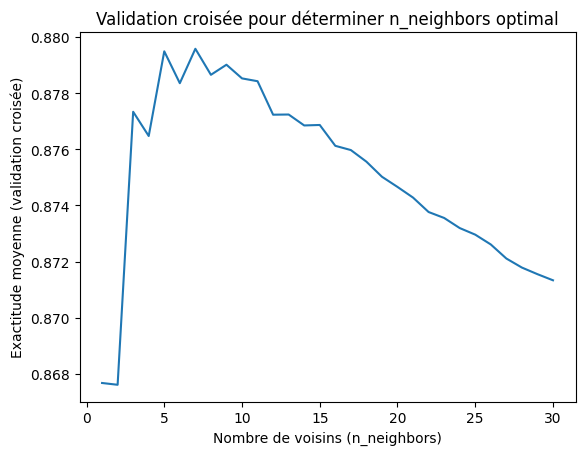

In [28]:
n_neighbors_range = range(1, 31)
cv_scores = []  


for n in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy') 
    cv_scores.append(scores.mean())


optimal_n = n_neighbors_range[np.argmax(cv_scores)]
print(f"Le nombre optimal de voisins est : {optimal_n}")


import matplotlib.pyplot as plt

plt.plot(n_neighbors_range, cv_scores)
plt.xlabel('Nombre de voisins (n_neighbors)')
plt.ylabel('Exactitude moyenne (validation croisée)')
plt.title('Validation croisée pour déterminer n_neighbors optimal')
plt.show()


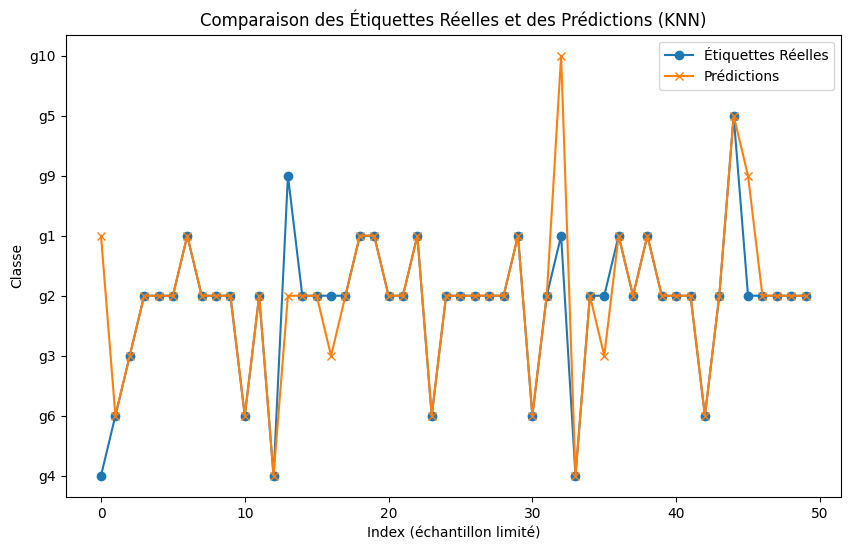

In [39]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train_pca, y_train)  


sample_size = 50  
plt.figure(figsize=(10, 6))
plt.plot(range(sample_size), y_test[:sample_size], label='Étiquettes Réelles', marker='o') 
plt.plot(range(sample_size), y_pred[:sample_size], label='Prédictions', marker='x')
plt.title('Comparaison des Étiquettes Réelles et des Prédictions (KNN)')
plt.xlabel('Index (échantillon limité)')
plt.ylabel('Classe')
plt.legend()
plt.show()




C:\Users\X280\OneDrive\Documents\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


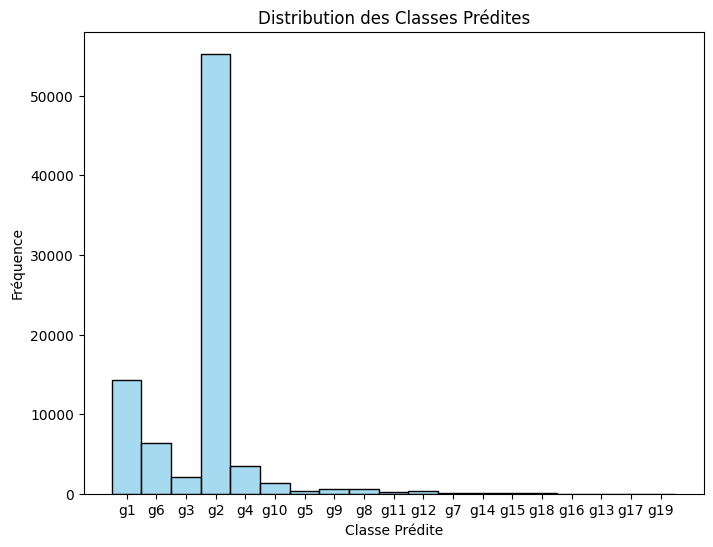

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=len(set(y_pred)), kde=False, color='skyblue')
plt.title('Distribution des Classes Prédites')
plt.xlabel('Classe Prédite')
plt.ylabel('Fréquence')
plt.show()

## SVM

Exactitude du modèle SVM : 0.7774


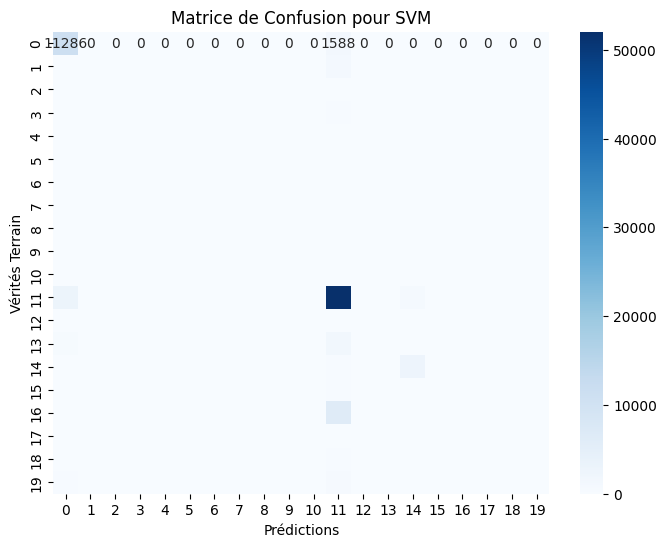

In [41]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') 


svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Exactitude du modèle SVM : {svm_accuracy:.4f}")
